In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = tf.keras.models.load_model('ava_fooddrink_prediction.h5')

Metal device set to: Apple M1 Pro


2023-04-16 12:42:58.818087: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-16 12:42:58.818115: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
import tensorflow as tf
from PIL import Image
import numpy as np
import requests

def preprocess_image(image):
    # Resize the image to the required input shape
    image = image.resize((299, 299))
    # Convert the image to a numpy array
    image = np.array(image)
    # Scale the pixel values to be between 0 and 1
    image = image / 255.0
    # Convert the image to RGB format
    if image.shape[-1] == 4:
        image = image[..., :3]
    return image

# Define the predict function
def predict_aesthetic_score(image):
    # Preprocess the image
    preprocessed_image = preprocess_image(image)
    # Make the prediction
    score = model.predict(np.expand_dims(preprocessed_image, axis=0))[0][0]
    return score

1/1 [==============================] - 0s 25ms/step


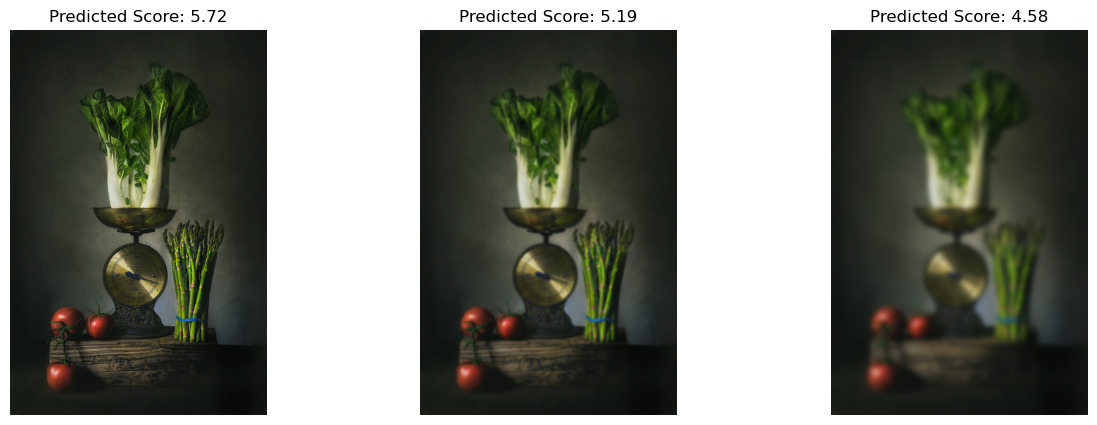

In [29]:
import matplotlib.pyplot as plt

image_high = Image.open('/Users/user/Desktop/Projects/CMSE890 - AML/image/Example for final report/7,6 - high qual.jpeg')
image_mid = Image.open('/Users/user/Desktop/Projects/CMSE890 - AML/image/Example for final report/7,6 - blur little.jpeg')
image_low = Image.open('/Users/user/Desktop/Projects/CMSE890 - AML/image/Example for final report/7,6 - blur much.jpeg')

example1 = [image_high, image_mid, image_low]

fig, ax = plt.subplots(1,3, figsize=(15,5))
[ax.set_axis_off() for ax in ax.ravel()]
for i in range(3):
    ax[i].imshow(example1[i])
    preprocess_image(example1[i])
    score = predict_aesthetic_score(example1[i])
    ax[i].set_title(f"Predicted Score: {score:.2f}")

1/1 [==============================] - 0s 26ms/step


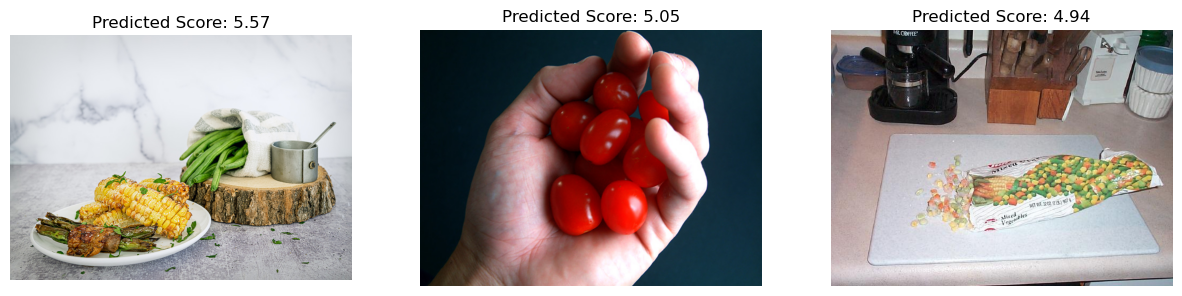

In [31]:
image_good = Image.open('/Users/user/Desktop/Projects/CMSE890 - AML/image/Example for final report/1277159 - 6,45.jpeg')
image_soso = Image.open('/Users/user/Desktop/Projects/CMSE890 - AML/image/Example for final report/4,99.jpeg')
image_bad = Image.open('/Users/user/Desktop/Projects/CMSE890 - AML/image/Example for final report/3,09.jpeg')

example2 = [image_good, image_soso, image_bad]

fig, ax = plt.subplots(1,3, figsize=(15,5))
[ax.set_axis_off() for ax in ax.ravel()]
for i in range(3):
    ax[i].imshow(example2[i])
    preprocess_image(example2[i])
    score = predict_aesthetic_score(example2[i])
    ax[i].set_title(f"Predicted Score: {score:.2f}")